## Data visualization on the Iris dataset

In [1]:
##Importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Avoiding unnecessary warnings from being displayed
import warnings
warnings.filterwarnings('ignore')

---

In [2]:
##Loading the dataset
iris_data = pd.read_csv('Iris.csv', encoding='utf-8')

##Viewing metadata of the dataset
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [3]:
##Viewing some sample data
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### How many species of iris are described in this dataset?

In [8]:
print("Number of iris species detailed : ", len(iris_data.Species.unique()))
print("They are :",iris_data.Species.unique())

Number of iris species detailed :  3
They are : ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


The ID column does not contribute to the dataset. It functions as a duplicate index to the row IDs. So it can be discaded

In [14]:
iris_data = iris_data.drop('Id', axis=1)
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### How many samples do we have of each species?

In [15]:
iris_data.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

### What range of values do each of the parameters span?

Ranges and their distribution can be easily explained using boxplots

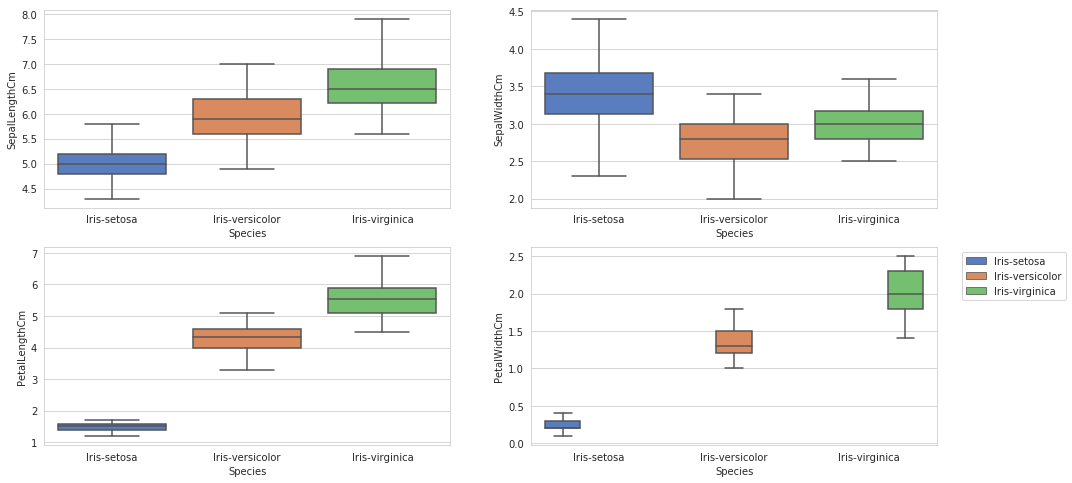

In [31]:
##Setting chart style
sns.set_style("whitegrid")

##Setting up the grid
f, ax = plt.subplots(2,2,figsize=(16,8))

##Creating subplots
box1 = sns.boxplot(data=iris_data,x='Species',y='SepalLengthCm',\
                  palette="muted", showfliers=False,ax=ax[0,0])

box2 = sns.boxplot(data=iris_data,x='Species',y='SepalWidthCm',\
                  palette="muted", showfliers=False, ax=ax[0,1])

box3 = sns.boxplot(data=iris_data,x='Species',y='PetalLengthCm',\
                  palette="muted", showfliers=False, ax=ax[1,0])

box4 = sns.boxplot(data=iris_data,x='Species',y='PetalWidthCm', hue='Species',\
                  palette="muted", showfliers=False, ax=ax[1,1])

plt.legend(loc=2, bbox_to_anchor=(1.05,1))
plt.show()

We can see clearly that the sizes of Petal length, Petal width and Sepal length of the 3 species have relation-
Setosa < Versicolor < Virginica

### Viewing observations of the ranges

This can be done by overlaying a stripplot over the boxplot

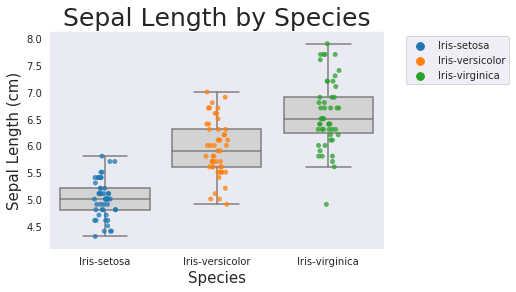

In [47]:
##Setting chart style
sns.set_style("dark")

sns.boxplot(data=iris_data,x='Species',y='SepalLengthCm',\
                  showfliers=False, color='lightgray')
sns.stripplot(data=iris_data,x='Species',y='SepalLengthCm', hue='Species',\
             jitter=True, alpha=0.75)
plt.ylabel('Sepal Length (cm)',fontsize=15)
plt.xlabel('Species',fontsize=15)
plt.legend(loc=2,bbox_to_anchor=(1.05,1))
plt.title('Sepal Length by Species', fontsize=25)
plt.show()

### Visualizing both

Violin plots combine the range description of boxplots while showing the probability distribution of the values

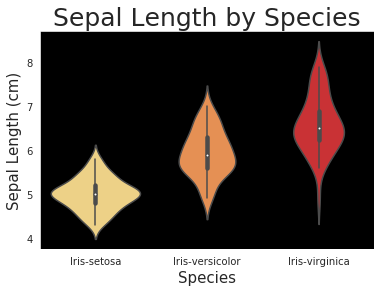

In [48]:
##Setting chart style
sns.set_style("dark",{"axes.facecolor":"black"})

sns.violinplot(data=iris_data, x='Species', y='SepalLengthCm',\
              palette='YlOrRd')
plt.ylabel('Sepal Length (cm)',fontsize=15)
plt.xlabel('Species',fontsize=15)
plt.title('Sepal Length by Species', fontsize=25)
plt.show()

The box within each plot shows the box-plot representation 
whereas the body of the violin shows the distribution of samples across the range.

---

### Viewing correlation between attributes

Correlation between a pair of attributes can be visualized ideally using scatter plots.

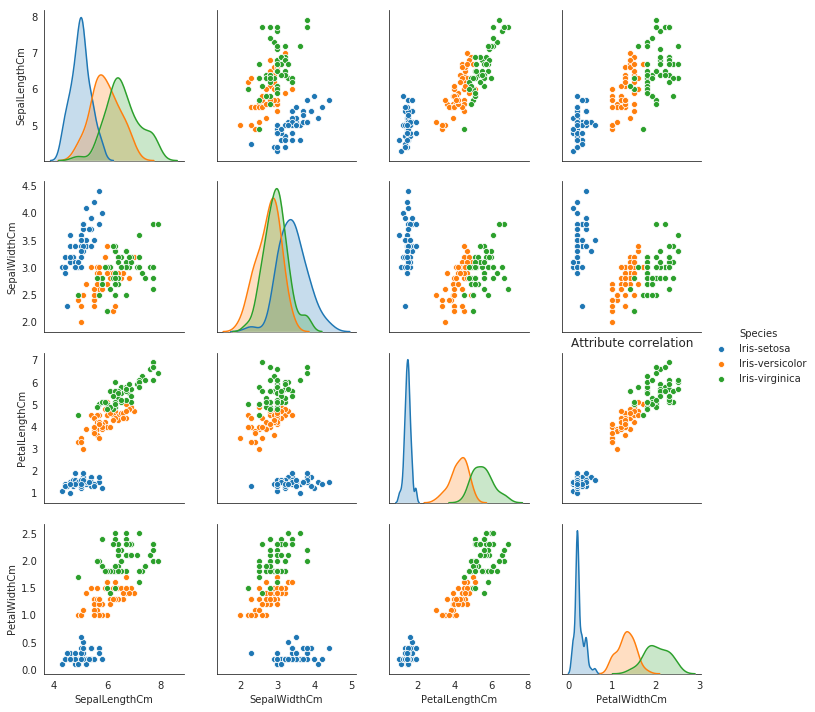

In [52]:
sns.set_style('white')
sns.pairplot(iris_data, hue='Species')
plt.show()

In each of the graphs we can see that the Setosa iris is distinct from the other two

### Viewing correlation along with probability distribution

KDE plots aptly depict bivariate probability distributions.

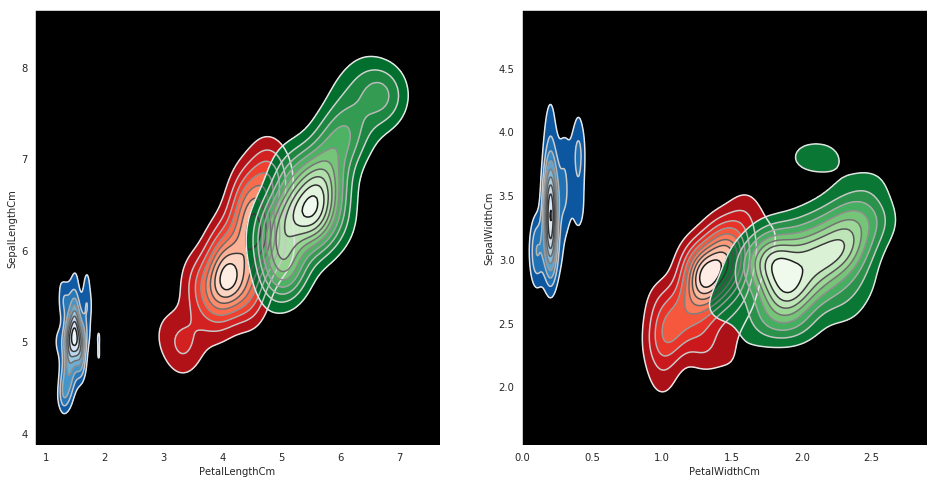

In [25]:
sns.set_style("dark",{"axes.facecolor":"black"})
f, axes = plt.subplots(1,2, figsize=(16,8))

##Plotting sepal length and petal length
k1 = sns.kdeplot(iris_data[iris_data.Species=='Iris-setosa'].PetalLengthCm, \
                iris_data[iris_data.Species=='Iris-setosa'].SepalLengthCm, shade=True, shade_lowest=False, cmap='Blues_r',\
                ax=axes[0])
k1b = sns.kdeplot(iris_data[iris_data.Species=='Iris-setosa'].PetalLengthCm, \
                iris_data[iris_data.Species=='Iris-setosa'].SepalLengthCm, cmap='gist_gray_r',ax=axes[0])

k1 = sns.kdeplot(iris_data[iris_data.Species=='Iris-versicolor'].PetalLengthCm, \
                iris_data[iris_data.Species=='Iris-versicolor'].SepalLengthCm, shade=True, shade_lowest=False, cmap='Reds_r',\
                ax=axes[0])
k1b = sns.kdeplot(iris_data[iris_data.Species=='Iris-versicolor'].PetalLengthCm, \
                iris_data[iris_data.Species=='Iris-versicolor'].SepalLengthCm, cmap='gist_gray_r',ax=axes[0])


k1 = sns.kdeplot(iris_data[iris_data.Species=='Iris-virginica'].PetalLengthCm, \
                iris_data[iris_data.Species=='Iris-virginica'].SepalLengthCm, shade=True, shade_lowest=False, cmap='Greens_r',\
                ax=axes[0])
k1b = sns.kdeplot(iris_data[iris_data.Species=='Iris-virginica'].PetalLengthCm, \
                iris_data[iris_data.Species=='Iris-virginica'].SepalLengthCm, cmap='gist_gray_r',ax=axes[0])

##Plotting sepal width and petal width
k2 = sns.kdeplot(iris_data[iris_data.Species=='Iris-setosa'].PetalWidthCm, \
                iris_data[iris_data.Species=='Iris-setosa'].SepalWidthCm, shade=True, shade_lowest=False, cmap='Blues_r',\
                ax=axes[1])
k2b = sns.kdeplot(iris_data[iris_data.Species=='Iris-setosa'].PetalWidthCm, \
                iris_data[iris_data.Species=='Iris-setosa'].SepalWidthCm, cmap='gist_gray_r',ax=axes[1])

k2 = sns.kdeplot(iris_data[iris_data.Species=='Iris-versicolor'].PetalWidthCm, \
                iris_data[iris_data.Species=='Iris-versicolor'].SepalWidthCm, shade=True, shade_lowest=False, cmap='Reds_r',\
                ax=axes[1])
k2b = sns.kdeplot(iris_data[iris_data.Species=='Iris-versicolor'].PetalWidthCm, \
                iris_data[iris_data.Species=='Iris-versicolor'].SepalWidthCm, cmap='gist_gray_r',ax=axes[1])

k2 = sns.kdeplot(iris_data[iris_data.Species=='Iris-virginica'].PetalWidthCm, \
                iris_data[iris_data.Species=='Iris-virginica'].SepalWidthCm, shade=True, shade_lowest=False, cmap='Greens_r',\
                ax=axes[1])
k2b = sns.kdeplot(iris_data[iris_data.Species=='Iris-virginica'].PetalWidthCm, \
                iris_data[iris_data.Species=='Iris-virginica'].SepalWidthCm, cmap='gist_gray_r',ax=axes[1])

The characteristics of the setosa variant(blue) are distinct from the versicolor(red) and virginica(green) variants, as shown by the earlier scatter plot. Additionally, the setosa variant has a smaller range as compared to the other two